# This Project serves as the last portfolio project as part of the [Codecademy](https://www.codecademy.com/career-journey/data-scientist-ml) data science: machine learning specialist career path and aims to independently analzye the data from a source called "OKCupid"
--------------------------------
### "The purpose of this project is to practice formulating questions and implementing machine learning techniques to answer those questions. However, the questions you ask and how you answer them are entirely up to you."


## More about the idea:
   > `from the direct Codecademy source` : In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance. In this portfolio project, you will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.


Althought the dataset revolves around the concept of dating I want to re-direct the vector of attention to to a more general tone thus reframing it into "Recommend a Peer". The usual steps including Data Preprocessing, Exploratory Data Analysis, Machine Learning Model Selection, Evaluation, and Tuning, will be followed. The `Scope` ultimately is to showcase what I learnt throughtout the career path. I also plan to refactor the code to accomodate the concept of pipelines and explore deploying it for a more practical feel further down the line.

To be more specific this project, utilizes three machine learning models in order to achieve different goals:

    > Predicting a feature about a user based on data available
    > Grouping users in order to recognize patterns
    > A recommender model that recommendes a peer

## Current Planned Progression:

    1. Exploring the dataset
        1a. Basic Information
        1b. Data Types
        1c. Addressing features (Isolating and Dropping features) 
    2. Data Preprocessing
        2a. Nulls
        2b. Outliers
        2c. Inspecting Data Distibutions
        2e. Formatting Issues
        .. extra
    3. Exploratory Data Analysis
        3a. Understanding the Age distribution
        3b. Eating habits (relation with body type?)
        3c. Usage of Prohibited materials (affects on health)
        3d. Frequency of Education (across ages) - (edu vs income)
        3e. Frequency of Jobs - (Jobs vs incomes) - (Max vs Min Jobs)
        3f. Frequency and Proportions of Locations (Average income and height per location) - (Highest Frequency Job in each Location)
        3g. Activity on the site - (Activity per location)
        3h. Is there an association between having pet and a child? (exploring different associations)
        ... Exploring hypothesis tests 
        ... Exploring exploring further associations 
        ... Exploring feature engineering before feeding them into the machine learning models - Filter Methods
        ... Exploring feature engineering after choosing the model - Wrapper Methods 
        ... Methods to counter overfitting on training data
        ... Tuning hyperparameters on the validation set
        ... Inspecting the final model's ability to generalize on new unseen data through the test set
        ... Saving the final model in a format with all hyperparameters needed and weights
        ... Future upgrades and ideas that could be implemented in the future

    4. Machine Learning Model
        I plan on using 3 models to predict:
            >  If the use would be a smoker or not (Supervised)
            >  Group Users in order to discover patterns (Unsupervised)
            >  Recommend a user based on common attributes (Supervised)
        aspects from the EDA section that will intersect and iterate with this part:
           ... Exploring feature engineering after choosing the model - Wrapper Methods 
           ... Methods to counter overfitting on training data
           ... Tuning hyperparameters on the validation set
           ... Inspecting the final model's ability to generalize on new unseen data through the test set
           ... Saving the final model in a format with all hyperparameters needed and weights


### As Always importing basic libraries

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Exploring the Dataset

In [175]:
Individuals = pd.read_csv("profiles.csv")
print(f"Overall users : {len(Individuals)}")
Ind,test_set = train_test_split(Individuals,train_size = 0.70,test_size=0.15,random_state = 42)

Overall users : 59946


In [176]:
Ind.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
48937,24,NaN,NaN,socially,NaN,graduated from college/university,NaN,i just got home from teaching english in manta...,NaN,NaN,...,"oakland, california",doesn&rsquo;t have kids,straight,NaN,NaN,m,pisces but it doesn&rsquo;t matter,NaN,"english, spanish",single
55273,56,thin,mostly vegetarian,socially,never,graduated from masters program,"i am fun loving, professional, open minded and...",i am enjoying life with friends and family. i ...,communication; instigator; i make a mean pr ch...,"my smile, kindness and younger than my age looks.",...,"san rafael, california",NaN,straight,likes dogs and likes cats,other but not too serious about it,f,aries,no,"english (fluently), spanish (fluently), italia...",single
5823,26,average,NaN,often,often,graduated from college/university,"i'm a really nerdy, really nice guy, working a...",trying not to get burned out as an engineer be...,"computers, memorizing song lyrics, and keeping...","that i'm just shy, not anti-social. (you can t...",...,"palo alto, california",NaN,straight,likes dogs and likes cats,atheism and somewhat serious about it,m,taurus but it doesn&rsquo;t matter,sometimes,english (fluently),single
7457,25,NaN,mostly anything,NaN,NaN,working on law school,born and raised in maine but knew immediately ...,meandering through law school.,making music playlists... i take a lot of prid...,i only like to answer self-congratulatory ques...,...,"san francisco, california",NaN,gay,NaN,agnosticism but not too serious about it,m,aquarius but it doesn&rsquo;t matter,NaN,english,single
34435,25,jacked,vegan,desperately,sometimes,NaN,"i'm a queer, vegan, ftm trans guy. holla!",being a deadbeat,giggling. making out!,tomatillo.,...,"san francisco, california",NaN,bisexual,likes dogs and likes cats,NaN,m,taurus,no,english,single


In [177]:
Ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41962 entries, 48937 to 39236
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          41962 non-null  int64  
 1   body_type    38260 non-null  object 
 2   diet         24933 non-null  object 
 3   drinks       39874 non-null  object 
 4   drugs        32120 non-null  object 
 5   education    37332 non-null  object 
 6   essay0       38112 non-null  object 
 7   essay1       36698 non-null  object 
 8   essay2       35210 non-null  object 
 9   essay3       33971 non-null  object 
 10  essay4       34586 non-null  object 
 11  essay5       34300 non-null  object 
 12  essay6       32234 non-null  object 
 13  essay7       33257 non-null  object 
 14  essay8       28551 non-null  object 
 15  essay9       33085 non-null  object 
 16  ethnicity    37975 non-null  object 
 17  height       41960 non-null  float64
 18  income       41962 non-null  int64  
 19  job  

> ### 1- The Datatypes of features refer to the type of data they represent, which determines the type of operations that can be performed on them and the statistical methods applicable to each.

> ### 2- Features' data types are within reason, however, a further inspection is needer to understand the inner values of each feature.

In [178]:
Ind.income.unique()

array([     -1,   70000,   40000,   80000,   60000,   20000, 1000000,
        150000,  100000,   30000,  250000,   50000,  500000], dtype=int64)

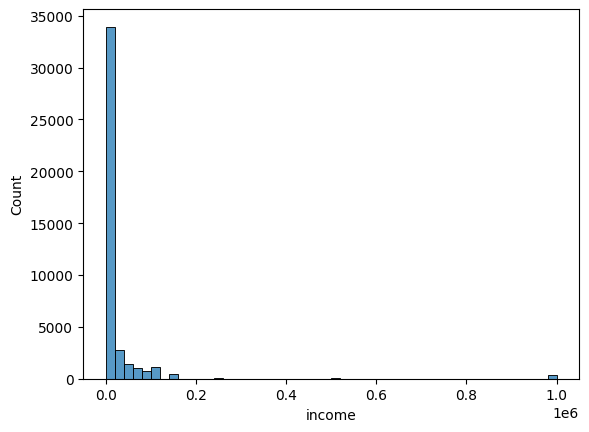

<Figure size 640x480 with 0 Axes>

In [179]:
sns.histplot(Ind.income, bins=50)
plt.plot()
plt.show()
plt.clf()

>### 1-  Pandas (A famous python library for data processing), recorded `int64` for this feature as there are no values with decimals.

>### 2- Note that a value of `-1` has been recorded for many cases. Initially, dealing with that value as a missing value and imputing it is an option but what if people did not share their income on purpose and `-1` was recorder instead?

>### 3- Larger values of income are present in the histplot which also indicates the presence of outliers.

## A very effective way is to look at the dataframe's description (numerice features)

In [180]:
Ind.describe()

,age,height,income
count,41962.000000,41960.000000,41962.000000
mean,32.331443,68.285534,20002.289190
std,9.436049,4.008154,97547.615163
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


>### A very minimal table yet lengthy description. The income feature statistics aligns with what we looked at there are many `-1` values as percentiles, and a whooping `1000000.000000` value that could skew the income feature. The height feature has a minimum of `1` which does not make any sense.

In [181]:
Ind.height.unique()

array([70., 66., 71., 67., 76., 64., 68., 69., 74., 65., 72., 61., 73.,
       59., 75., 63., 62., 60., 77., 78., 48., 50., 55., 57.,  8., 51.,
        1., 81., 79., 82., 58., 56., 52., 80., 84., 94., 83., 43., 85.,
       95., nan, 36., 53., 88.,  3., 49., 54., 47.,  9., 91., 89., 92.,
       87., 42., 37.,  6.,  4.])

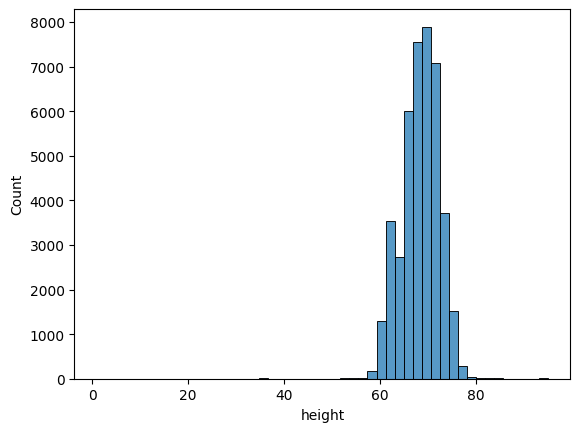

<Figure size 640x480 with 0 Axes>

In [182]:
sns.histplot(Ind.height, bins=50) 
plt.plot()
plt.show()
plt.clf()

>### 1- As seen by both outputs of the .unique() method and the histogram plots, there are values that like the `1.` inch value that may be an input error. Pre-processing will take care of that.

>### 2- The hisplot looks normally distributed.

# Regarding features

> I plan to Isolate all `essay` variables in one dataframe to expand later on with Natural Language Processing (NLP). (Future Expansion)
    
> I do not plan on using the `orientation`, `religion`, `status`, `sign` features. 

In [183]:
essays = Ind[Ind.filter(regex = "essay[0-9]").columns]
essays.columns

Index(['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6',
       'essay7', 'essay8', 'essay9'],
      dtype='object')

In [184]:
Ind.drop(Ind.filter(regex = "essay[0-9]").columns, axis=1,inplace=True)

In [185]:
Ind.drop(['orientation','religion','status','sign'],axis=1,inplace=True)

In [186]:
Ind.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'income', 'job', 'last_online', 'location', 'offspring',
       'pets', 'sex', 'smokes', 'speaks'],
      dtype='object')

In [187]:
Ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41962 entries, 48937 to 39236
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          41962 non-null  int64  
 1   body_type    38260 non-null  object 
 2   diet         24933 non-null  object 
 3   drinks       39874 non-null  object 
 4   drugs        32120 non-null  object 
 5   education    37332 non-null  object 
 6   ethnicity    37975 non-null  object 
 7   height       41960 non-null  float64
 8   income       41962 non-null  int64  
 9   job          36228 non-null  object 
 10  last_online  41962 non-null  object 
 11  location     41962 non-null  object 
 12  offspring    17069 non-null  object 
 13  pets         28057 non-null  object 
 14  sex          41962 non-null  object 
 15  smokes       38086 non-null  object 
 16  speaks       41922 non-null  object 
dtypes: float64(1), int64(2), object(14)
memory usage: 5.8+ MB


# Data Preprocessing

## Any missing values?
### In addition to values that could be indicative of a missing/incorrect value in the `income` and `height` fields. It is needed to address NaN (null) values in the dataset

In [188]:
Ind.isna().any()

age            False
body_type       True
diet            True
drinks          True
drugs           True
education       True
ethnicity       True
height          True
income         False
job             True
last_online    False
location       False
offspring       True
pets            True
sex            False
smokes          True
speaks          True
dtype: bool

In [189]:
Ind.isna().sum()

age                0
body_type       3702
diet           17029
drinks          2088
drugs           9842
education       4630
ethnicity       3987
height             2
income             0
job             5734
last_online        0
location           0
offspring      24893
pets           13905
sex                0
smokes          3876
speaks            40
dtype: int64

### 1- In terms of categorical features, I will simply replace all null values with an 'Not Shared' to avoid potentially introducing high bias into the dataset. 

### 2- For `height` (A numeric feature), I will remove null observations as they very low in number.

In [190]:
categorical_cols = list(Ind.select_dtypes(include = 'object').columns)
numeric_cols = list(Ind.select_dtypes(include = ['int64','float64']).columns)
Ind[categorical_cols] = Ind[categorical_cols].fillna('Not Shared')

In [191]:
categorical_cols

['body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'ethnicity',
 'job',
 'last_online',
 'location',
 'offspring',
 'pets',
 'sex',
 'smokes',
 'speaks']

In [192]:
numeric_cols

['age', 'height', 'income']

In [193]:
Ind.dropna(subset=['height'],axis=0,inplace=True)

In [194]:
Ind.isna().any()

age            False
body_type      False
diet           False
drinks         False
drugs          False
education      False
ethnicity      False
height         False
income         False
job            False
last_online    False
location       False
offspring      False
pets           False
sex            False
smokes         False
speaks         False
dtype: bool

### Additionaly I want to check on both `height` and `income` values that were viewed before.

In [195]:
Ind.height.value_counts().sort_index()

height
1.0        1
3.0        1
4.0        1
6.0        1
8.0        1
9.0        1
36.0       8
37.0       1
42.0       1
43.0       2
47.0       1
48.0       2
49.0       1
50.0       2
51.0       1
52.0       1
53.0       4
54.0       2
55.0       6
56.0       7
57.0      12
58.0      31
59.0     150
60.0     531
61.0     758
62.0    1556
63.0    1970
64.0    2737
65.0    2678
66.0    3332
67.0    3753
68.0    3793
69.0    3592
70.0    4302
71.0    3366
72.0    3716
73.0    1961
74.0    1746
75.0     980
76.0     546
77.0     200
78.0      93
79.0      40
80.0      20
81.0       6
82.0      10
83.0      11
84.0       4
85.0       1
87.0       1
88.0       1
89.0       1
91.0       1
92.0       1
94.0       2
95.0      13
Name: count, dtype: int64

>### I am under the assumption that very low heights (in inches) are incorrect. I will conclude all heights under 48 inches as erroneous and then inspect distributions later on.

In [196]:
Ind = Ind[Ind.height >= 48.0]

In [197]:
# Once more re-inspecting the unqiue values in income
Ind.income.unique()

array([     -1,   70000,   40000,   80000,   60000,   20000, 1000000,
        150000,  100000,   30000,  250000,   50000,  500000], dtype=int64)

In [198]:
Ind.income.value_counts().sort_index()

income
-1          33925
 20000       2051
 30000        735
 40000        702
 50000        675
 60000        523
 70000        490
 80000        782
 100000      1133
 150000       428
 250000       100
 500000        33
 1000000      364
Name: count, dtype: int64

> ### A lot of `-1` values that's for sure. This leads me to believe that this data is not missing at random (MNAR) and many do not like to share important aspects like their income. I will leave it be moving forward.

You could inspect the following [BLOG](https://medium.com/analytics-vidhya/different-types-of-missing-data-59c87c046bf7) for more information on missing types of data. 

# Are there any apparent outliers?

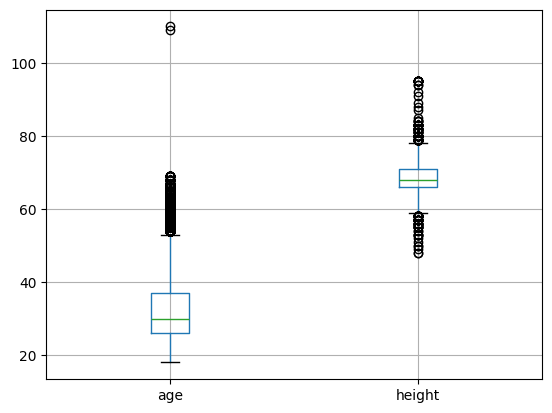

<Figure size 640x480 with 0 Axes>

In [199]:
Ind[[col for col in numeric_cols if col != 'income']].boxplot()
plt.show()
plt.clf()

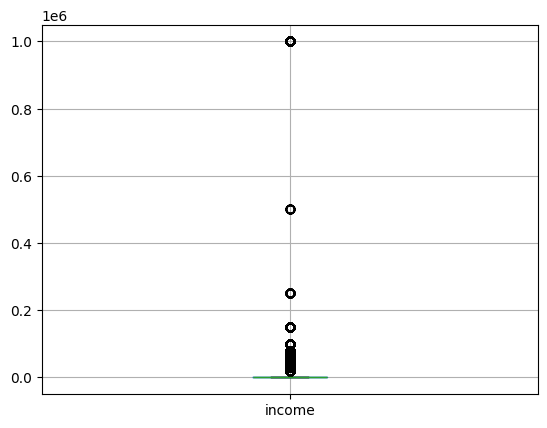

<Figure size 640x480 with 0 Axes>

In [200]:
Ind[['income']].boxplot()
plt.show()
plt.clf()

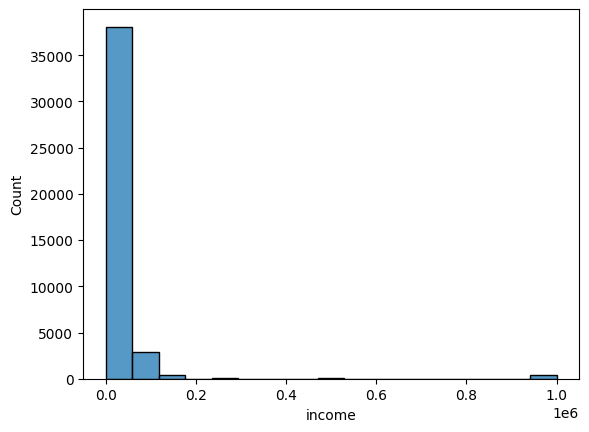

<Figure size 640x480 with 0 Axes>

In [201]:
sns.histplot(Ind.income)
plt.show()
plt.clf()

>### 1- Boxplots and Hisograms can help you eye-catch outliers. I separated `income` from both `age` and `height` as it is in a higher scale (A this early point, we must consider scaling them later on is important)

>### 2- `age` and `income` showcase values that appear to be extreme thus the need to deal with them. A simple way to is to clip those two features then observe the results for further actions. (I may bin income as many values are -1 that indicate that values are not shared)

>### 3- Within the `heights` boxplot, the values (indicated  by black circles) could represent an actual person that is very tall/short so I won't consider limiting this feature further. 

In [202]:
Ind.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,sex,smokes,speaks
48937,24,Not Shared,Not Shared,socially,Not Shared,graduated from college/university,other,70.0,-1,Not Shared,2012-06-26-08-22,"oakland, california",doesn&rsquo;t have kids,Not Shared,m,Not Shared,"english, spanish"
55273,56,thin,mostly vegetarian,socially,never,graduated from masters program,hispanic / latin,66.0,-1,other,2012-07-01-00-36,"san rafael, california",Not Shared,likes dogs and likes cats,f,no,"english (fluently), spanish (fluently), italia..."
5823,26,average,Not Shared,often,often,graduated from college/university,white,71.0,-1,computer / hardware / software,2012-06-20-13-53,"palo alto, california",Not Shared,likes dogs and likes cats,m,sometimes,english (fluently)
7457,25,Not Shared,mostly anything,Not Shared,Not Shared,working on law school,white,71.0,-1,student,2012-05-20-18-37,"san francisco, california",Not Shared,Not Shared,m,Not Shared,english
34435,25,jacked,vegan,desperately,sometimes,Not Shared,other,67.0,-1,retired,2012-06-17-12-03,"san francisco, california",Not Shared,likes dogs and likes cats,m,no,english


In [203]:
def cap_outliers(df,cols):
    
    feature_bounds = {}
    for feature in cols:
        Q1 = np.percentile(df[feature],25)
        Q3 = np.percentile(df[feature],75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2 * IQR 
        upper_bound = Q3 + 2 * IQR

        
        df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
        df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])
        
        feature_bounds[feature] = (lower_bound,upper_bound)
    return feature_bounds

In [204]:
feature_bounds = cap_outliers(Ind,['age'])
feature_bounds

{'age': (4.0, 59.0)}

In [205]:
# Apply the bounds to the test test
test_set = test_set[(test_set.age >= feature_bounds['age'][0]) & (test_set.age <= feature_bounds['age'][1])] #instead of np.where()

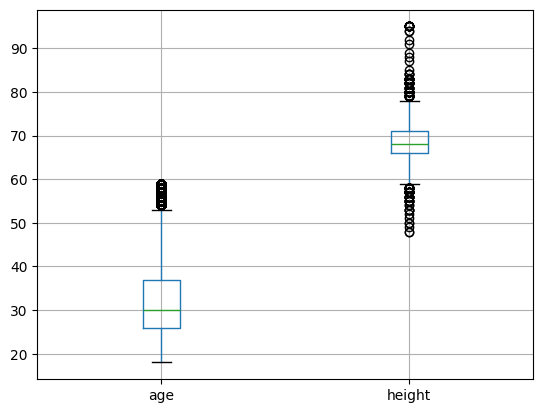

<Figure size 640x480 with 0 Axes>

In [206]:
Ind[[col for col in numeric_cols if col != 'income']].boxplot()
plt.show()
plt.clf()

In [207]:
def bin_income(df):
    df['income_category'] = df.income.apply(lambda x: np.nan if x == -1 else x)

    bins = [0, 50000, 100000, 500000, float(np.inf)]
    labels = ['$0-$50k', '$50k-$100k', '$100k-$500k', '$500k+']

    df['income_category'] = pd.cut(
    df['income'], 
    bins=bins,
    labels=labels,
    right=False)

    df['income_category'] = df['income_category'].astype('object').fillna('Not Shared')

In [208]:
bin_income(Ind)

In [209]:
Ind.income_category.unique()

array(['Not Shared', '$50k-$100k', '$0-$50k', '$500k+', '$100k-$500k'],
      dtype=object)

In [210]:
indices = Ind.income_category.value_counts().index

In [211]:
values = Ind.income_category.value_counts().values

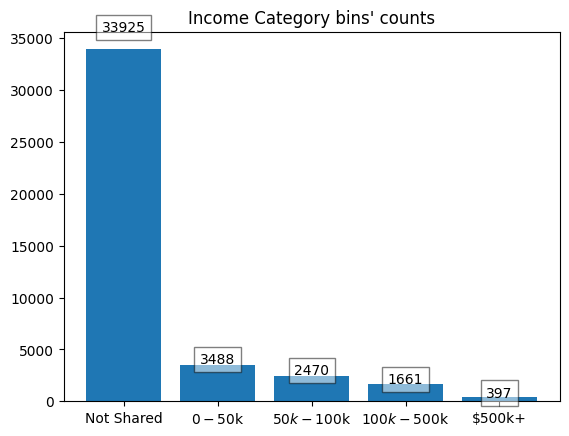

<Figure size 640x480 with 0 Axes>

In [212]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]*1.05,y[i],ha = 'center',bbox = dict(facecolor = 'white', alpha =.5)) # https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
                                                                                           # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html
plt.bar(x=indices,height=values)
addlabels(x=indices,y=values)
plt.title("Income Category bins' counts")
plt.show()
plt.clf()

> ### I will drop the income column (converted to category bins) and assign it to a new dataframe

In [213]:
Individuals = Ind.drop("income",axis=1)

In [214]:
Individuals.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,job,last_online,location,offspring,pets,sex,smokes,speaks,income_category
48937,24.0,Not Shared,Not Shared,socially,Not Shared,graduated from college/university,other,70.0,Not Shared,2012-06-26-08-22,"oakland, california",doesn&rsquo;t have kids,Not Shared,m,Not Shared,"english, spanish",Not Shared
55273,56.0,thin,mostly vegetarian,socially,never,graduated from masters program,hispanic / latin,66.0,other,2012-07-01-00-36,"san rafael, california",Not Shared,likes dogs and likes cats,f,no,"english (fluently), spanish (fluently), italia...",Not Shared
5823,26.0,average,Not Shared,often,often,graduated from college/university,white,71.0,computer / hardware / software,2012-06-20-13-53,"palo alto, california",Not Shared,likes dogs and likes cats,m,sometimes,english (fluently),Not Shared
7457,25.0,Not Shared,mostly anything,Not Shared,Not Shared,working on law school,white,71.0,student,2012-05-20-18-37,"san francisco, california",Not Shared,Not Shared,m,Not Shared,english,Not Shared
34435,25.0,jacked,vegan,desperately,sometimes,Not Shared,other,67.0,retired,2012-06-17-12-03,"san francisco, california",Not Shared,likes dogs and likes cats,m,no,english,Not Shared


In [215]:
Individuals.income_category.unique()

array(['Not Shared', '$50k-$100k', '$0-$50k', '$500k+', '$100k-$500k'],
      dtype=object)

### A pirplot can "create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column."

https://seaborn.pydata.org/generated/seaborn.pairplot.html

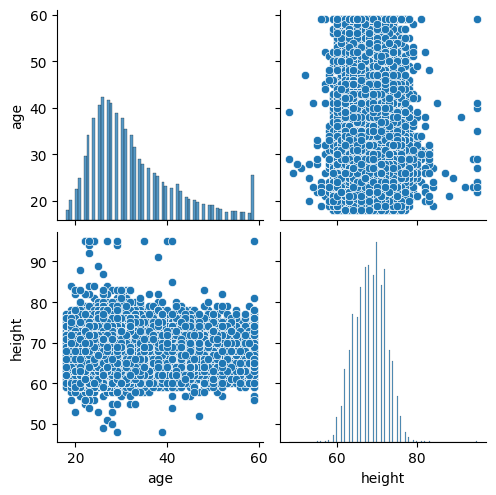

<Figure size 640x480 with 0 Axes>

In [216]:
sns.pairplot(Individuals)
plt.show()
plt.clf()

> ### 1- Looking at the diagonal we could insepct the distributio of both numerical variables
> ### 2- The Height variable as inspected before seems normally distribured
> ### 3- The age variable is somewhat skewed and that could be dealt with via things like applying the log transformation (typically on right-skewed data), normalize our data, or apply machine learning algorithms that do not get affected by outliers to a high degree
> ### 4- The scatter plots does not show any particular trend, but there is a dense population between ages 60 - 80 and heights 60 - 80 as well

# Explartory data Analysis 
Where we explore, inspect, and analyze a dataset to understand characterstics about it.


I had the following list drafter to explore univariate (A statistic about a single feature), bivariate (statistics about two features), and Multivariate (statistics about muultiple features) analysis.

    3a. Understanding the Age distribution
    3b. Eating habits (+ relation with body type?)
    3c. The prevalence of dangerous acts 
    3d. Frequency of Education (+ across ages) - (+ edu vs income)
    3e. Frequency of Jobs - (Jobs vs incomes) - (Max vs Min Jobs in terms of salary)
    3f. Frequency and Proportions of Locations (Average income and height per location) - (Highest Frequency Job in each Location)
    3g. Activity on the site - (Activity per location)
    3h. Is there an association between having pet and a child? (exploring different associations) (dealing and understanding the answers in the offspring variable)
    ... Exploring hypothesis tests 
    ... Exploring exploring further associations 
    ... Exploring feature engineering before feeding them into the machine learning models - Filter Methods
    ... Exploring feature engineering after choosing the model - Wrapper Methods 
    ... Methods to counter overfitting on training data
    ... Tuning hyperparameters on the validation set
    ... Inspecting the final model's ability to generalize on new unseen data through the test set
    ... Saving the final model in a format with all hyperparameters needed and weights
    ... Future upgrades and ideas that could be implemented in the future

## Inspecting the age distribution 

The typical age of a user on this site: 32 years old


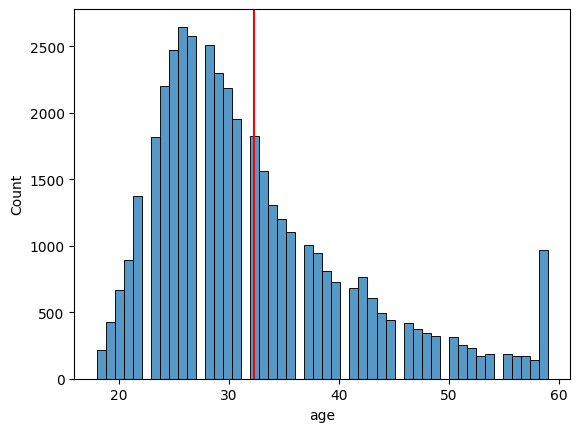

<Figure size 640x480 with 0 Axes>

In [217]:
mean_age = Individuals.age.mean()
print(f"The typical age of a user on this site: {round(mean_age)} years old")
sns.histplot(Individuals.age,bins=50)
plt.axvline(mean_age,color='r')
plt.show()
plt.clf()

In [218]:
std = Individuals.age.mean()

> ### As mentioned previoulsy during pre-processing, the data is somewhat right-skewed. However I do not plan on applying a log transform until verifying the performance of models on this feature as it is to keep the interpretability aspect intact. Normalizing the data and choosing a robust model will help in achieving better results as well. 

## What are the frequency of diets adopted across the userbase?
    Does it have any association with the bodytype?

In [219]:
Individuals.diet.value_counts()

diet
Not Shared             17018
mostly anything        11718
anything                4306
strictly anything       3589
mostly vegetarian       2407
mostly other             705
strictly vegetarian      599
vegetarian               428
strictly other           320
mostly vegan             252
other                    225
strictly vegan           151
vegan                     97
mostly kosher             51
mostly halal              35
strictly kosher           14
strictly halal            13
kosher                     7
halal                      6
Name: count, dtype: int64

In [220]:
Individuals.diet.value_counts(normalize = True)

diet
Not Shared             0.405760
mostly anything        0.279392
anything               0.102668
strictly anything      0.085573
mostly vegetarian      0.057390
mostly other           0.016809
strictly vegetarian    0.014282
vegetarian             0.010205
strictly other         0.007630
mostly vegan           0.006008
other                  0.005365
strictly vegan         0.003600
vegan                  0.002313
mostly kosher          0.001216
mostly halal           0.000835
strictly kosher        0.000334
strictly halal         0.000310
kosher                 0.000167
halal                  0.000143
Name: proportion, dtype: float64

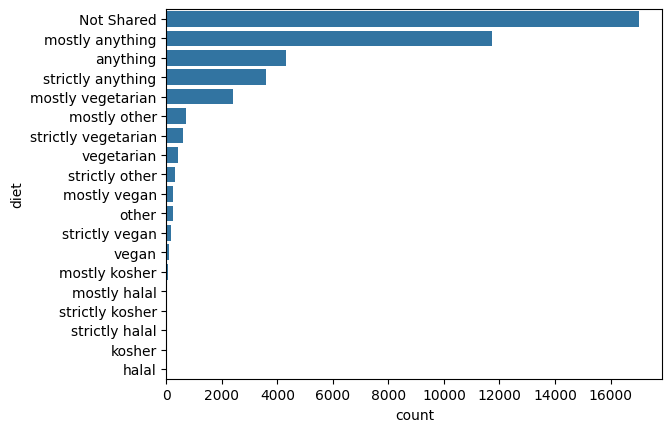

<Figure size 640x480 with 0 Axes>

In [221]:
counts = Individuals.diet.value_counts().sort_values(ascending=False)
columns = Individuals.diet.value_counts().sort_values(ascending=False).index
sns.barplot(x=counts, y=columns)
plt.show()
plt.clf()

> ### An observation noticed is that each type of diet has been split into three restrictions : That diet itself (assuming that it is the lowest contraint), Mostly (Which incorporates the diet to the most part but may allow other diet plans into theirs), Strictly (Will only follow that diet without exceptions)
> ### Other than those who did not wanted to share their private diet habits (my assumption), the highest percentage of users seem to like eating mostly anything allowing for other diet options to potentially to take roles in their lifes.

## Question: Does diet have any association with body type?

    > This question tackles the association between diet and bodytype features to see if there are significant associations or not.
    > Since we are analyzing features in a sample and want to generalize results to the population, we rely on hypothesis testing.
    > Both features are categorical so the Hypothesis test appropriate to test our question would the "Chi-square Statistic" Hypothesis test.

We have two hypotheses:

    The Null Hypothesis : There is not a significant association between the diet a person takes and their bodytype.
    The Alternative Hypothesis: There is a significant association between the diet a person takes and their bodytype.

We use the test results to decide whether to reject the null hypothesis or fail to reject it, based on the p-value.

In [224]:
cross_tab_d_body_type = pd.crosstab(Individuals.diet,Individuals.body_type)

In [225]:
cross_tab_d_body_type

body_type,Not Shared,a little extra,athletic,average,curvy,fit,full figured,jacked,overweight,rather not say,skinny,thin,used up
diet,,,,,,,,,,,,,
Not Shared,2605,722,3168,3994,1022,3180,299,96,113,75,488,1198,58
anything,200,196,926,1157,267,929,69,21,30,12,127,357,15
halal,1,0,0,2,0,0,0,0,0,0,1,2,0
kosher,1,1,0,0,0,3,0,0,0,0,1,0,1
mostly anything,384,582,2421,3132,799,2658,214,74,104,35,334,921,60
mostly halal,2,5,11,5,2,5,0,2,1,0,0,0,2
mostly kosher,2,1,13,9,3,8,3,1,0,1,2,5,3
mostly other,18,37,178,166,58,157,17,11,7,3,13,28,12
mostly vegan,21,10,42,39,17,66,1,3,2,1,12,36,2


> ### The cross tabulation produces a table of frequencies between the two features

chi2_contingency: [chi-square](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)  <-- Link

In [ ]:
from scipy.stats import chi2_contingency 

In [249]:
def chi_square(df,feature1,feature2,include_not_shared = True):

    if df[feature1].dtype != "object" or df[feature1].dtype != "object":
        return "Both features need to be categorical"
        
    cross_tab = pd.crosstab(df[feature1],df[feature2])
    if include_not_shared:
        chi2, pval, dof, f = chi2_contingency(cross_tab)
    else:
        cross_tab_NS = pd.crosstab(df[feature1][df[feature1] != "Not Shared"],df[feature2][df[feature2] != "Not Shared"])
        chi2, pval, dof, f = chi2_contingency(cross_tab_NS)
        return cross_tab_NS,chi2,pval
        
    return cross_tab,chi2,pval

In [240]:
# Including not shared in myabs results to retain secrecy
cross_tab_d_body_type, chi2, pval = chi_square(Individuals,"diet","body_type")

In [241]:
print(F"The probabilty value : {pval}, and chi-square statistic : {chi2}")

The probabilty value : 0.0, and chi-square statistic : 2567.38427229049


> ### 1 - p-value (pval): The p-value tells us the probability of observing the data (or something more extreme) if the null hypothesis is true. A small p-value (typically <0.05) indicates that the observed association is unlikely under the null hypothesis, leading us to reject it.

> ### 2-Chi-square Statistic: This statistic measures the difference between the observed and expected frequencies in a contingency table. The Larger values suggest a greater deviation from independence (no association), which may support the alternative hypothesis.

### The pval < 0.05 (and the chi-square statstic is high as well) which leads to the rejection of the Null Hypothesis and supporting that the association between `diet` and `body_type` is significant.

In [238]:
# What if we remove not shared?
cross_tab_d_body_type_nsr, chi2, pval = chi_square(Individuals,"diet","body_type",False)

In [239]:
print(F"The probabilty value : {pval}, and chi-square statistic : {chi2}")

The probabilty value : 3.2402042456306293e-78, and chi-square statistic : 808.9475409045854


> ### When including "Not Shared" responses, the association was highly significant (χ² = 2567.38, p = 0.0).
> ### When excluding "Not Shared", the association remained highly significant (χ² = 808.95, p = 3.24 × 10⁻⁷⁸).
> ### These results indicate a strong association between diet and body type, whether or not 'Not Shared' responses are included. The larger chi-square value when including 'Not Shared' suggests that this group may reflect non-random behavior, possibly influenced by conscious decisions or privacy preferences.

### Here is a frequency plot of `body_type`to paint the full picture

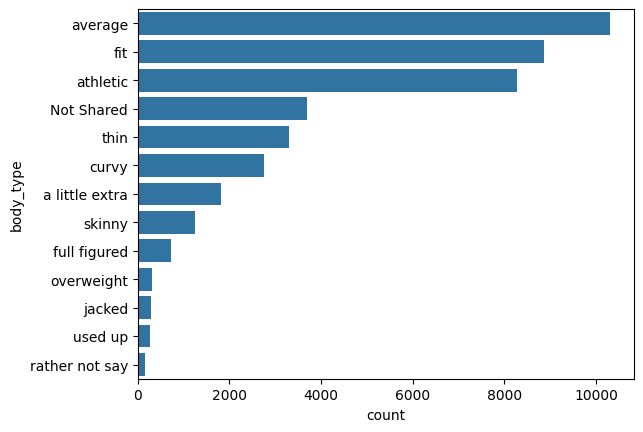

<Figure size 640x480 with 0 Axes>

In [234]:
counts = Individuals.body_type.value_counts().sort_values(ascending=False)
columns = Individuals.body_type.value_counts().sort_values(ascending=False).index
sns.barplot(x=counts, y=columns)
plt.show()
plt.clf()

> ### 1- Most of the user base  seems to fall under the average body_type.

> ### 2- Less people would `rather not say`, while `Not Shared` could either be people who did not submit the question on purpose to avoid it (my assumption) or missed it for any case. 

## How widespread are dangerous acts like `drugs` and smoking (`smokes`) in the dataset?
    Are they associated?

    The Null Hypothesis : There is not a significant association between the drug use and smoking.
    The Alternative Hypothesis: There is a significant association between the drug use and smoking.

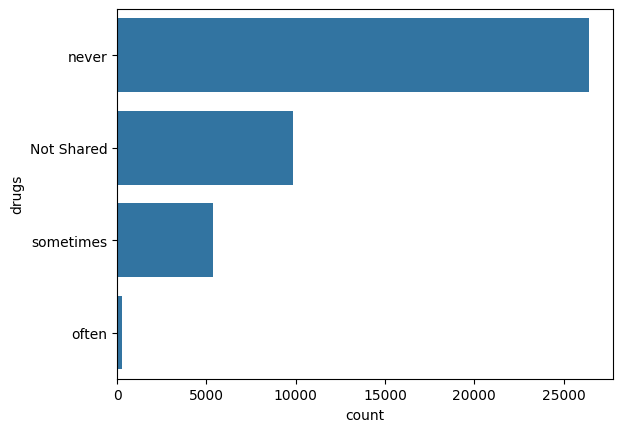

<Figure size 640x480 with 0 Axes>

In [235]:
counts = Individuals.drugs.value_counts().sort_values(ascending=False)
columns = Individuals.drugs.value_counts().sort_values(ascending=False).index
sns.barplot(x=counts, y=columns)
plt.show()
plt.clf()

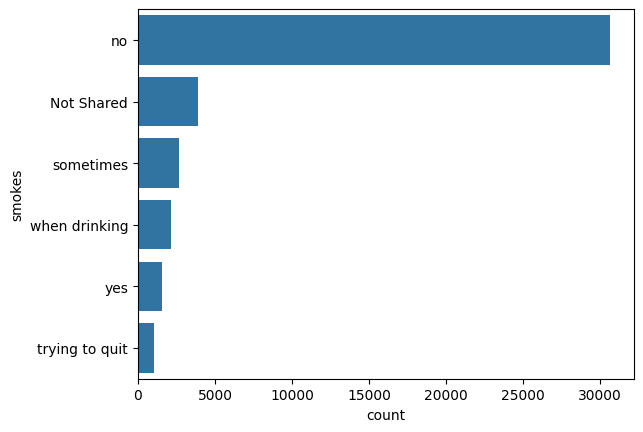

<Figure size 640x480 with 0 Axes>

In [236]:
counts = Individuals.smokes.value_counts().sort_values(ascending=False)
columns = Individuals.smokes.value_counts().sort_values(ascending=False).index
sns.barplot(x=counts, y=columns)
plt.show()
plt.clf()

> ### Most of the users never used drugs.

> ### Most of the users do not smoke. 

### To test their association, since they are both categorical as well we would follow the same hypothesis test used in the diet and body_type association test (Chi-square). 

In [237]:
cross_tab_d_smokes, chi2, pval = chi_square(Individuals, "drugs", "smokes")

print(F"The probabilty value : {pval}, and chi-square statistic : {chi2}")

The probabilty value : 0.0, and chi-square statistic : 6079.410460076302


### The pval < 0.05 (and the chi-square statstic is high as well) which leads to the rejection of the Null Hypothesis and supporting that the association between smoking and drug use is significant.

In [242]:
cross_tab_d_smokes_nsr, chi2, pval = chi_square(Individuals, "drugs", "smokes",False)

print(F"The probabilty value : {pval}, and chi-square statistic : {chi2}")

The probabilty value : 0.0, and chi-square statistic : 4329.480247537403


> ### When including "Not Shared" responses, the association was highly significant (χ² = 6079.41, p = 0.0).
> ### When excluding "Not Shared", the association remained highly significant (χ² = 4329.48, p = 0.0).
> ### These results indicate a strong association between diet and body type, whether or not 'Not Shared' responses are included. The larger chi-square value when including 'Not Shared' suggests that this group may reflect non-random behavior, possibly influenced by conscious decisions or privacy preferences.

## How does the education levels vary across the dataset?
    Does it vary with age? 
    Does it have anything to do with income ? (association)
    
Frequency of Education (+ across ages) - (+ edu vs income) - (+ across ages and an income hue) `(Remove this line)`

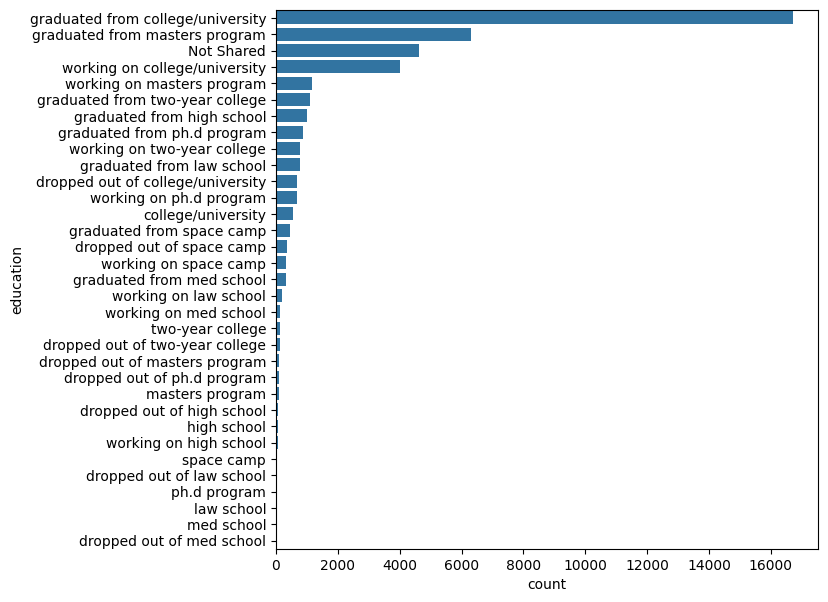

education
graduated from college/university    16700
graduated from masters program        6310
Not Shared                            4624
working on college/university         4001
working on masters program            1170
graduated from two-year college       1093
graduated from high school            1009
graduated from ph.d program            890
working on two-year college            783
graduated from law school              775
dropped out of college/university      674
working on ph.d program                672
college/university                     564
graduated from space camp              450
dropped out of space camp              366
working on space camp                  329
graduated from med school              317
working on law school                  197
working on med school                  144
two-year college                       144
dropped out of two-year college        135
dropped out of masters program         106
dropped out of ph.d program             99
m

<Figure size 640x480 with 0 Axes>

In [243]:
counts = Individuals.education.value_counts().sort_values(ascending=False)
columns = Individuals.education.value_counts().sort_values(ascending=False).index
plt.figure(figsize = (7,7))
sns.barplot(x=counts, y=columns)
plt.show()
plt.clf()

print(counts)

> ### 1- Many situations/education levels are present. Combining some into a bigger category is an option but I will keep them in order to inspect the differences as intended on a deeper level (e.g. drop outs of a PHD is different from drop outs from high-school and combining them into drop outs could affect the accuracy of the outcome).

> ### 2- Most of the users have `graduatued from college/university`, while the lowest amount `dropped out of med school`.

## How does education vary with age?

I will try looking at a box plot to inspect how median ages (the exact middle line in the box plot) look at/between each level.

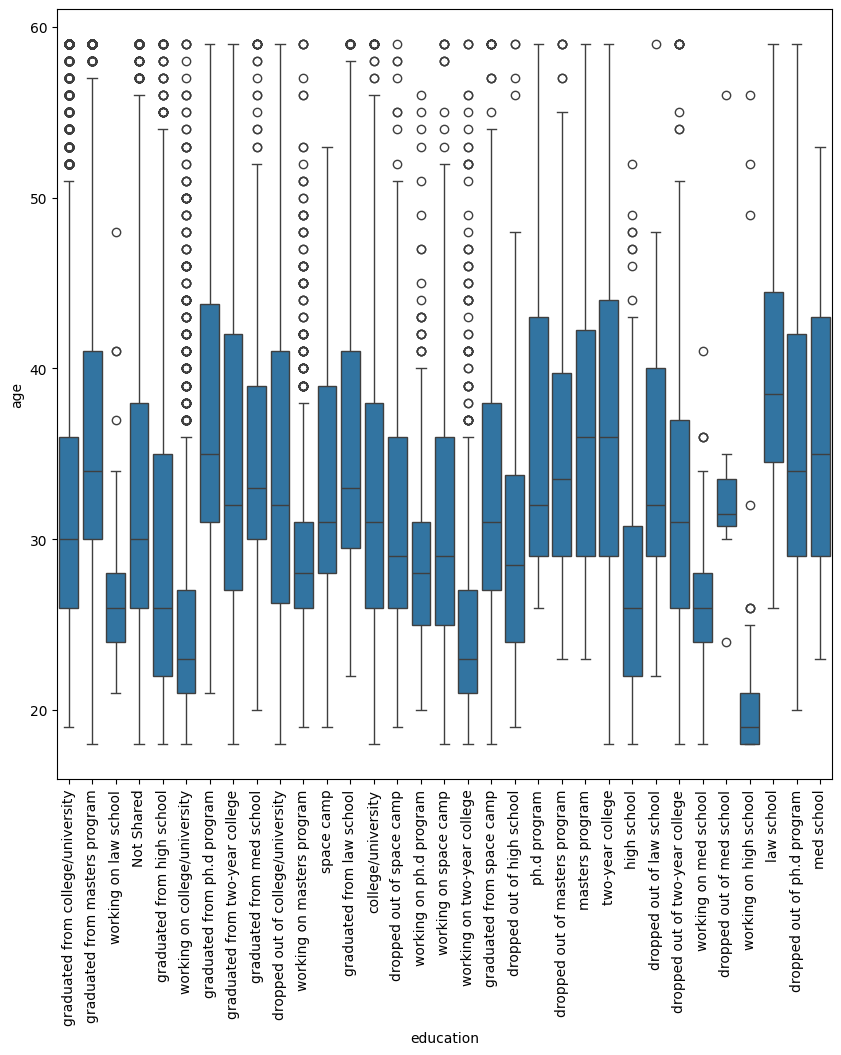

<Figure size 640x480 with 0 Axes>

In [244]:
plt.figure(figsize = (10,10))
sns.boxplot(x="education",y="age",data = Individuals)
plt.xticks(rotation = 90)
plt.show()
plt.clf()

> ### 1- As we have many levels it is understandble that the plot would be jam-packed, and since `age` reflects the current age of the user while education reflects their highest education level achieved, we could hand-pick cases like `graduated from college/university`, `graduated from masters program`, and `med school`.

> ### 2- The typical age of those who graduated from estimated to be 30 years old is much less than both other cases that are higher which I assume to be spent studying for the degree before actively engaging in the site.

> ### 3- Many of the levels have overlapping regions the IQR (the upper bound, which is the 75th percentile, of the blue box in the plot and the lower bound, which is the 25th percentile of the data.). Essentialy meaning they have similar values. You can inspect cases like those who `dropped out of ph.d program` and those who finished `med school`. You can inspect those who are working on masters and on their phd as well.

## Does education affect income values according to my dataset?

    The Null Hypothesis : Education levels do not affect income values.
    The Alternative Hypothesis: Education levels affect income values.


In [251]:
cross_tab_d_ed_income, chi2, pval = chi_square(Individuals, "education", "income_category")

print(F"The probabilty value : {pval}, and chi-square statistic : {chi2}")

The probabilty value : 0.0, and chi-square statistic : 4265.062651881933


In [253]:
cross_tab_d_ed_income_nsr, chi2, pval = chi_square(Individuals, "education", "income_category", False)

print(F"The probabilty value : {pval}, and chi-square statistic : {chi2}")

The probabilty value : 0.0, and chi-square statistic : 2366.7293437214735


> ### When including "Not Shared" responses, the association was highly significant (χ² = 4265.06, p = 0.0).
> ### When excluding "Not Shared", the association remained highly significant (χ² = 2366.72, p = 0.0).
> ### These results indicate a strong association between diet and body type, whether or not 'Not Shared' responses are included. The larger chi-square value when including 'Not Shared' suggests that this group may reflect non-random behavior, possibly influenced by conscious decisions or privacy preferences.